In [2]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

D:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
cian_df=pd.read_csv('cian_data_clean.csv')

# Feature engineering

### Создаём признак "Количество комнат+кухня":

In [4]:
cian_df['Название'].value_counts()

2-комн. квартира           8673
3-комн. квартира           8402
1-комн. квартира           7480
Студия                     3500
4-комн. квартира           2515
5-комн. квартира            767
Многокомнатная квартира     649
Name: Название, dtype: int64

In [5]:
def count_rooms(x):
    if x=='Студия':
        a=1
        return a
    if x=='1-комн. квартира':
        a=2
        return a
    if x=='2-комн. квартира':
        a=3
        return a
    if x=='3-комн. квартира':
        a=4
        return a
    if x=='4-комн. квартира':
        a=5
        return a
    if x=='5-комн. квартира':
        a=6
        return a
    if x=='Многокомнатная квартира':
        a=7
        return a

In [6]:
cian_df['Количество комнат+кухня'] = cian_df['Название'].apply(count_rooms)

### Создаём 2 новых признака: "Количество раздельных санузлов", "Количество совмещённых санузлов"

In [7]:
cian_df.Санузел.value_counts()

1 раздельный                   15627
1 совмещенный                  10521
2 раздельных                    3106
1 совмещенный, 1 раздельный     1125
2 совмещенных                    540
3 раздельных                     375
2 совмещенных, 1 раздельный      342
4 раздельных                      98
2 совмещенных, 2 раздельных       81
1 совмещенный, 2 раздельных       76
3 совмещенных                     45
4 совмещенных                     21
3 совмещенных, 1 раздельный       10
3 совмещенных, 2 раздельных        4
4 совмещенных, 1 раздельный        4
2 совмещенных, 3 раздельных        3
4 совмещенных, 4 раздельных        2
4 совмещенных, 2 раздельных        2
1 совмещенный, 4 раздельных        1
3 совмещенных, 3 раздельных        1
2 совмещенных, 4 раздельных        1
1 совмещенный, 3 раздельных        1
Name: Санузел, dtype: int64

In [8]:
pattern_razd=re.compile('\d\sразд')
pattern_sovm=re.compile('\d\sсовм')

In [9]:
def count_sovm(x):
    try:
        a=int(str(pattern_sovm.findall(x)).replace(' совм','').replace('[','').replace(']','').replace("'",''))
        return a
    except:
        a=0
        return 0

In [10]:
def count_razd(x):
    try:
        a=int(str(pattern_razd.findall(x)).replace(' разд','').replace('[','').replace(']','').replace("'",''))
        return a
    except:
        a=0
        return 0

In [11]:
cian_df['Количество совмещенных санузлов']=cian_df['Санузел'].apply(count_sovm)
cian_df['Количество раздельных санузлов']=cian_df['Санузел'].apply(count_razd)

### Создаём 2 новых признака: "Количество балконов", "Количество лоджий"

In [12]:
cian_df['Балкон/лоджия'].value_counts()

1 балкон               16458
1 лоджия               12206
2 лоджии                1099
2 балкона               1087
1 балкон, 1 лоджия       729
3 балкона                157
3 лоджии                 127
4 балкона                 55
1 балкон, 2 лоджии        19
2 балкона, 1 лоджия       18
2 балкона, 2 лоджии       12
4 лоджии                  10
4 балкона, 3 лоджии        2
1 балкон, 3 лоджии         2
1 балкон, 4 лоджии         1
2 балкона, 3 лоджии        1
4 балкона, 1 лоджия        1
3 балкона, 1 лоджия        1
3 балкона, 3 лоджии        1
Name: Балкон/лоджия, dtype: int64

In [13]:
pattern_balkon=re.compile('\d\sбалк')
pattern_lodzh=re.compile('\d\sлодж')

In [14]:
def count_balkon(x):
    try:
        a=int(str(pattern_balkon.findall(x)).replace(' балк','').replace('[','').replace(']','').replace("'",''))
        return a
    except:
        a=0
        return 0

In [15]:
def count_lodzh(x):
    try:
        a=int(str(pattern_lodzh.findall(x)).replace(' лодж','').replace('[','').replace(']','').replace("'",''))
        return a
    except:
        a=0
        return 0

In [16]:
cian_df['Количество балконов']=cian_df['Балкон/лоджия'].apply(count_balkon)
cian_df['Количество лоджий']=cian_df['Балкон/лоджия'].apply(count_lodzh)

In [17]:
cian_df = cian_df.drop(['Название', 'Санузел', 'Балкон/лоджия'], axis=1)

In [18]:
cian_df.reset_index(inplace=True)
cian_df = cian_df.drop('index',axis=1)

### Создадим 2 новых признака: "Квартира на первом этаже" и "Квартира на последнем этаже"

In [19]:
cian_df['Квартира на 1 этаже']=np.nan
cian_df['Квартира на последнем этаже']=np.nan

In [20]:
cian_df['Квартира на 1 этаже'][cian_df['Этаж']==1] = cian_df['Квартира на 1 этаже'][cian_df['Этаж']==1].fillna(1)
cian_df['Квартира на 1 этаже'] = cian_df['Квартира на 1 этаже'].fillna(0)

D:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
cian_df['Квартира на последнем этаже'][cian_df['Этаж']==cian_df['Этажей в доме']]=cian_df['Квартира на последнем этаже'][cian_df['Этаж']==cian_df['Этажей в доме']].fillna(1)
cian_df['Квартира на последнем этаже'] = cian_df['Квартира на последнем этаже'].fillna(0)

D:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
cian_df['Квартира на 1 этаже'] = cian_df['Квартира на 1 этаже'].apply(lambda x: int(x))
cian_df['Квартира на последнем этаже'] = cian_df['Квартира на последнем этаже'].apply(lambda x: int(x))

In [23]:
cian_df.head()

,Описание,Адрес,Метро,Время до метро,Цена,Общая,Жилая,Кухня,Этаж,Построен,...,Микрорайон,Улица,Этажей в доме,Количество комнат+кухня,Количество совмещенных санузлов,Количество раздельных санузлов,Количество балконов,Количество лоджий,Квартира на 1 этаже,Квартира на последнем этаже
0,Арт. 36084264 Продаётся 2-к.квартира общей пло...,"Санкт-Петербург, р-н Кировский, Дачное, Ленинс...",Автово,15,6700000.0,48.40,28.600000,8.000000,3,1988.0,...,Дачное,Ленинский просп.,7,3,1,0,1,0,0,0
1,Арт. 43292484 Продаётся 4 комнатная коммунальн...,"Санкт-Петербург, р-н Кировский, Автово, просп....",Автово,5,10900000.0,113.40,80.000000,10.000000,5,1956.0,...,Автово,просп. Стачек,7,5,0,1,1,0,0,0
2,Арт. 43572482 В продаже просторная трёхкомнатн...,"Санкт-Петербург, р-н Кировский, Автово, просп....",Автово,8,14000000.0,103.00,63.500000,20.000000,3,1954.0,...,Автово,просп. Стачек,6,4,0,1,1,0,0,0
3,Арт. 35008138 Предлагается к продаже просторна...,"Санкт-Петербург, р-н Кировский, Автово, просп....",Кировский завод,7,8900000.0,86.47,57.000000,10.000000,1,1956.0,...,Автово,просп. Стачек,10,4,0,1,1,0,1,0
4,"Студия в историческом центре города, 5 минуты ...","Санкт-Петербург, р-н Адмиралтейский, Сенной, Г...",Спасская,4,2500000.0,14.00,7.734003,2.587987,2,1806.0,...,Сенной,Гороховая ул.,4,1,1,0,1,0,0,0


### Создадим признаки широта и долгота

In [5]:
!pip install geopy

In [10]:
from geopy.geocoders import Yandex

In [11]:
geolocator = Yandex(api_key='9169aca7-b00e-4539-ab1d-e7bb613cfee2')

In [12]:
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=0.5)

In [9]:
cian_df['Город и метро'] = 'Санкт-Петербург, метро ' + cian_df['Метро']
cian_df['Город и метро'].head()

0             Санкт-Петербург, метро Автово
1             Санкт-Петербург, метро Автово
2             Санкт-Петербург, метро Автово
3    Санкт-Петербург, метро Кировский завод
4           Санкт-Петербург, метро Спасская
Name: Город и метро, dtype: object

In [10]:
geocode('Санкт-Петербург, метро Автово', timeout=10)

Location(метро Автово, 1 линия, Санкт-Петербург, Россия, (59.86729, 30.261394, 0.0))

In [11]:
#Выгрузим в список геокоды для уникальных значений Метро:
geocodes=[]
for i in cian_df['Город и метро'].unique():
    geocodes.append(geocode(i, timeout=10))

In [15]:
geocodes_point=[geocodes[i].point[0:2] for i in range(len(geocodes))]

In [27]:
latitude_metro=np.array([geocodes_point[i][0] for i in range(len(geocodes_point))])
longitude_metro=np.array([geocodes_point[i][1] for i in range(len(geocodes_point))])

In [18]:
len(cian_df['Метро'].unique())

71

In [30]:
cian_df['Широта метро']=np.nan
cian_df['Долгота метро']=np.nan

In [32]:
cian_df = cian_df.drop('Геокод',axis=1)

In [48]:
for i in range(len(cian_df['Метро'].unique())):
    cian_df['Широта метро'][cian_df['Метро']==cian_df['Метро'].unique()[i]] = cian_df['Широта метро'][cian_df['Метро']==cian_df['Метро'].unique()[i]].fillna(latitude_metro[i])
    cian_df['Долгота метро'][cian_df['Метро']==cian_df['Метро'].unique()[i]] = cian_df['Долгота метро'][cian_df['Метро']==cian_df['Метро'].unique()[i]].fillna(longitude_metro[i])
    

D:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
geocode(cian_df['Адрес'][0])

Location(Ленинский проспект, 115, Санкт-Петербург, Россия, (59.851223, 30.247542, 0.0))

In [17]:
len(cian_df['Адрес'].unique())

9432

In [18]:
#Выгрузим в список геокоды для уникальных значений адресов:
geocodes_adress=[]
for i in cian_df['Адрес'].unique():
    geocodes_adress.append(geocode(i, timeout=10))

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Василеостровский, Остров Декабристов, Морская наб., 45',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\sit

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Василеостровский, Гавань, просп. Средний Васильевского острова, 91к2',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Ana

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, Пулковское ш., 71к3',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Павловская ул., 63',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Павловская ул., 43',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages

RateLimiter swallowed an error after 2 retries. Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, Московский просп., 205',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 274, in __call__
    res = self.func(*args, **kwargs)
  File "D:\Users\User\Anaconda3\lib\site-

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, Пулковское ш., 9К1',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-p

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Понтонная ул., 11к1',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-package

RateLimiter swallowed an error after 2 retries. Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Кубинская ул., 54',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 274, in __call__
    res = self.func(*args, **kwargs)
  File "D:\Users\User\Anaconda3\lib\site-packages

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Тосненский пер., 16',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-package

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Ленинский просп., 147',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-p

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, Варшавская ул., 96',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-p

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, Штурманская ул., 26К1',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\sit

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, бул. Трудящихся, 4',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, просп. Ленина, 16/11',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packag

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Новгородская ул., 16к1',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-pack

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, ул. Костюшко, 66',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packag

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Веры Слуцкой, 19',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packag

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Тазаева, 14',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages\ge

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, просп. Ленина, 74',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages\

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, Московский просп., 163',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\si

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Московская ул., 11',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Новоизмайловский просп., 32К4',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\li

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Ленинский просп., 154',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-p

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Веры Слуцкой, 34',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packag

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Загородная ул., 50',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Пролетарская ул., 60к3',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-pack

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Танкистов, 30',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages\

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Ленинский просп., 147к2',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, Пулковское ш., 89',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-pa

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Ижорского Батальона, 18',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, Ленинский просп., 176',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\sit

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Ремизова, 15',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages\g

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, бул. Трудящихся, 19',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-package

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, пл. Чернышевского, 2',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, просп. Ленина, 71',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages\

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Заводской просп., 44',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packag

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Стахановская ул., 15к1',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-pack

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Пролетарская ул., 139',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packa

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Тазаева, 1',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages\geo

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, 1-й Предпортовый проезд, 14',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, бул. Трудящихся, 35к1',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packa

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Кубинская ул.',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages\

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Заводской просп., 56',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packag

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, Ленинский просп., 161',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\sit

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, пл. Чернышевского, 3',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Анисимова, 10',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages\

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Краснопутиловская ул., 105',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\s

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Понтонная ул., 1',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages\g

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Загородная ул., 41к2',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packag

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, Пулковское ш., 15К3',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Ижорского Батальона, 9',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Краснопутиловская ул., 111',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\s

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Губина, 12',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages\geo

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, бул. Трудящихся, 7',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Благодатная ул., 15',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-pac

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Веры Слуцкой, 48',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packag

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Загородная ул., 32',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Кубинская ул., 82к1',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-pac

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Новоизмайловский просп., 73',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Культуры, 9',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages\ge

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Краснопутиловская ул., 56к2',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, 1-й Предпортовый проезд',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, Московский просп., 181Ф',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\s

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Новоизмайловский просп., 32К1',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\li

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Новоизмайловский просп., 4',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\s

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Правды, 11',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages\geo

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Заводской просп., 62',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packag

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Красная ул., 10',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages\ge

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Тверская ул., 39',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages\g

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Веры Слуцкой, 16',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packag

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Губина, 14',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages\geo

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Веры Слуцкой, 9',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-package

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Ленинский просп., 151к3',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Варшавская ул., 61к1',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-pa

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Ленинский просп., 150',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-p

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, Алтайская ул., 4',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-pac

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, Варшавская ул., 104',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Краснопутиловская ул., 89',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\si

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Металлургов, 9',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Тосненский пер., 4',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Адмиралтейская, 25',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-pack

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, просп. Ленина, 18/12',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packag

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Бассейная ул., 7',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packag

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Красных Партизан, 3',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-pac

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Павловская ул., 76',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Ижорского Батальона, 4/35',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\si

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Кубинская ул., 82',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packa

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, ул. Костюшко, 30',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packag

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Пролетарская ул., 48',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packag

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, просп. Ленина, 21',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages\

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Пролетарская ул., 15',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packag

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Ижорского Батальона, 8',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Загородная ул., 43к5',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packag

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Братьев Радченко, 25',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-pa

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Новгородская ул., 9',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-package

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Коммуны, 5',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages\geo

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, Пулковское ш., 86',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-pa

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, Штурманская ул., 34',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Варшавская ул., 73',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-pack

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Краснопутиловская ул., 64',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\si

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Кубинская ул., 52',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packa

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Вавилова, 22',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages\g

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Ижорского Батальона, 14',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Краснопутиловская ул., 121',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\s

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Братьев Радченко, 19',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-pa

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Благодатная ул., 9',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-pack

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, бул. Трудящихся, 15к3',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packa

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, просп. Ленина, 75',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages\

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Заводской просп., 18',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packag

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Краснопутиловская ул., 115',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\s

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Веры Слуцкой, 87',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packag

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Ленинский просп., 162К2',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Краснопутиловская ул., 72',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\si

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Новоизмайловский просп., 40К1',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\li

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, ул. Костюшко, 36',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packag

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Октябрьская ул., 71к1',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packa

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Загородная ул., 62',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, бул. Трудящихся, 36',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-package

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, бул. Трудящихся, 11/17',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-pack

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, просп. Ленина, 23',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages\

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, ул. Пилотов, 18К4',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-pa

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Новоизмайловский просп., 26К1',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\li

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, Пулковское ш., 91',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-pa

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Раумская ул., 15',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages\g

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Новоизмайловский просп., 57К2',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\li

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Понтонная ул., 7к2',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, Пулковское ш., 99',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-pa

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Заводской просп., 48',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packag

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Загородная ул., 41к3',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packag

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, Октябрьская ул., 77/27',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-pack

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Варшавская ул., 45К4',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-pa

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Краснопутиловская ул., 113К1',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, просп. Ленина, 19/3',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-package

RateLimiter swallowed an error after 2 retries. Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, Варшавская ул., 110',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 274, in __call__
    res = self.func(*args, **kwargs)
  File "D:\Users\User\Anaconda3\lib\site-pac

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, Пулковское ш., 5К4',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-p

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, ул. Победы, 4',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packag

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, пл. Чернышевского, 8',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, Московский просп., 179',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\si

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, Московский просп., 183-185Бк10',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Санкт-Петербург, р-н Колпинский, мкр. Колпино, ул. Танкистов, 22',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib\site-packages\

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Новоизмайловское, Новоизмайловский просп., 101',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3\lib

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Санкт-Петербург, р-н Московский, Пулковский меридиан, Московский просп., 183-185Ак3',), **{'timeout': 10}).
Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 360, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 373, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\adapters.py", line 404, in _request
    text=resp.text,
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\Users\User\Anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "D:\Users\User\Anaconda3

In [34]:
geocodes_adress[8000:8050]

[Location(Невский проспект, 166, Санкт-Петербург, Россия, (59.926688, 30.377555, 0.0)),
 Location(Ковенский переулок, 22-24, Санкт-Петербург, Россия, (59.937436, 30.362338, 0.0)),
 Location(улица Чайковского, 83/7, Санкт-Петербург, Россия, (59.946198, 30.367054, 0.0)),
 Location(Малая Конюшенная улица, 7, Санкт-Петербург, Россия, (59.936746, 30.324699, 0.0)),
 Location(улица Достоевского, 20-22, Санкт-Петербург, Россия, (59.92492, 30.349618, 0.0)),
 Location(набережная канала Грибоедова, 2ББ, Санкт-Петербург, Россия, (59.939275, 30.329199, 0.0)),
 Location(Большая Конюшенная улица, 15, Санкт-Петербург, Россия, (59.939, 30.323234, 0.0)),
 Location(улица Смольного, 2к2, Санкт-Петербург, Россия, (59.951984, 30.393105, 0.0)),
 Location(4-я Советская улица, 42, Санкт-Петербург, Россия, (59.932036, 30.374312, 0.0)),
 Location(Невский проспект, 172/1, Санкт-Петербург, Россия, (59.926133, 30.379011, 0.0)),
 Location(улица Восстания, 9, Санкт-Петербург, Россия, (59.933365, 30.360443, 0.0)),
 Lo

In [41]:
len(geocodes_adress)

9432

In [42]:
geocodes_adress[0].point[0:2]

(59.851223, 30.247542)

**Выгрузились не все адреса, поэтому обработаем сначала те, которые есть:**

In [45]:
geocodes_adress_point=[]
for i in range(len(geocodes_adress)):
    try:
        geocodes_adress_point.append(geocodes_adress[i].point[0:2])
    except:
        geocodes_adress_point.append(np.nan)

In [51]:
shirota_adress=[]
for i in range(len(geocodes_adress_point)):
    try:
        shirota_adress.append(geocodes_adress_point[i][0])
    except:
        shirota_adress.append(np.nan)
        
dolgota_adress=[]
for i in range(len(geocodes_adress_point)):
    try:
        dolgota_adress.append(geocodes_adress_point[i][1])
    except:
        dolgota_adress.append(np.nan)

In [53]:
cian_df['Широта адреса']=np.nan
cian_df['Долгота адреса']=np.nan

In [54]:
for i in range(len(cian_df['Адрес'].unique())):
    cian_df['Широта адреса'][cian_df['Адрес']==cian_df['Адрес'].unique()[i]] = cian_df['Широта адреса'][cian_df['Адрес']==cian_df['Адрес'].unique()[i]].fillna(shirota_adress[i])
    cian_df['Долгота адреса'][cian_df['Адрес']==cian_df['Адрес'].unique()[i]] = cian_df['Долгота адреса'][cian_df['Адрес']==cian_df['Адрес'].unique()[i]].fillna(dolgota_adress[i])
    

D:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
#Проверим количество пропусков:
cian_df['Широта адреса'].isna().sum()

0

In [84]:
cian_df['Микрорайон'][cian_df['Долгота адреса'].isnull()].value_counts()

Series([], Name: Микрорайон, dtype: int64)

**Заполним пропуска средним значением по микрорайону**

In [76]:
cian_df['Долгота адреса'][cian_df['Микрорайон']==' Новоизмайловское'] = cian_df['Долгота адреса'][cian_df['Микрорайон']==' Новоизмайловское'].fillna(cian_df['Долгота адреса'][cian_df['Микрорайон']==' Новоизмайловское'].mean())
cian_df['Широта адреса'][cian_df['Микрорайон']==' Новоизмайловское'] = cian_df['Широта адреса'][cian_df['Микрорайон']==' Новоизмайловское'].fillna(cian_df['Широта адреса'][cian_df['Микрорайон']==' Новоизмайловское'].mean())

D:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
cian_df['Долгота адреса'][cian_df['Микрорайон']==' мкр. Колпино'] = cian_df['Долгота адреса'][cian_df['Микрорайон']==' мкр. Колпино'].fillna(cian_df['Долгота адреса'][cian_df['Микрорайон']==' мкр. Колпино'].mean())
cian_df['Широта адреса'][cian_df['Микрорайон']==' мкр. Колпино'] = cian_df['Широта адреса'][cian_df['Микрорайон']==' мкр. Колпино'].fillna(cian_df['Широта адреса'][cian_df['Микрорайон']==' мкр. Колпино'].mean())

D:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
cian_df['Долгота адреса'][cian_df['Микрорайон']==' Пулковский меридиан'] = cian_df['Долгота адреса'][cian_df['Микрорайон']==' Пулковский меридиан'].fillna(cian_df['Долгота адреса'][cian_df['Микрорайон']==' Пулковский меридиан'].mean())
cian_df['Широта адреса'][cian_df['Микрорайон']==' Пулковский меридиан'] = cian_df['Широта адреса'][cian_df['Микрорайон']==' Пулковский меридиан'].fillna(cian_df['Широта адреса'][cian_df['Микрорайон']==' Пулковский меридиан'].mean())

D:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Добавим расстояние от дома до центра и до метро

In [88]:
from geopy import distance

shirota_center, dolgota_center = 59.932662, 30.345674

In [91]:
cian_df['До центра'] = cian_df[['Широта адреса', 'Долгота адреса']].apply(
    lambda x: distance.distance((x[0],x[1]),(shirota_center, dolgota_center)).km, axis = 1)

In [98]:
cian_df['До метро'] = cian_df[['Широта адреса', 'Долгота адреса', 'Широта метро', 'Долгота метро']].apply(
    lambda x: distance.distance((x[0],x[1]),(x[2],x[3])).km, axis = 1)

### Добавим признак количество преступлений в районе

In [43]:
cian_df['Район'].unique()

array([' р-н Кировский', ' р-н Адмиралтейский', ' р-н Московский',
       ' р-н Курортный', ' р-н Василеостровский', ' р-н Красносельский',
       ' р-н Петродворцовый', ' р-н Центральный', ' р-н Колпинский',
       ' р-н Фрунзенский', ' р-н Приморский', ' р-н Пушкинский',
       ' р-н Выборгский', ' р-н Петроградский', ' р-н Калининский',
       ' р-н Красногвардейский', ' р-н Невский', ' р-н Кронштадтский'],
      dtype=object)

In [44]:
crimes=[2955,2224,2995,682,1726,3050,1114,2270,1287,2749,3546,1462,3715,1146,4031,2989,4000,377]

In [45]:
cian_df['Количество преступлений в районе']=np.nan

In [46]:
for i in range(len(cian_df['Район'].unique())):
    cian_df['Количество преступлений в районе'][cian_df['Район']==cian_df['Район'].unique()[i]] = cian_df['Количество преступлений в районе'][cian_df['Район']==cian_df['Район'].unique()[i]].fillna(crimes[i])

D:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


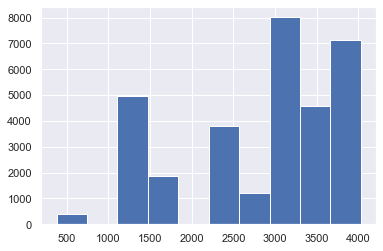

In [47]:
cian_df['Количество преступлений в районе'].hist()

# Визуализация

In [48]:
cian_df.columns

Index(['Описание', 'Адрес', 'Метро', 'Время до метро', 'Цена', 'Общая',
       'Жилая', 'Кухня', 'Этаж', 'Построен', 'Тип жилья', 'Высота потолков',
       'Тип дома', 'Тип перекрытий', 'Подъезды', 'Лифты', 'Отопление', 'Район',
       'Микрорайон', 'Улица', 'Этажей в доме', 'Количество комнат+кухня',
       'Количество совмещенных санузлов', 'Количество раздельных санузлов',
       'Количество балконов', 'Количество лоджий', 'Квартира на 1 этаже',
       'Квартира на последнем этаже', 'Город и метро', 'Широта метро',
       'Долгота метро', 'Широта адреса', 'Долгота адреса', 'До центра',
       'До метро', 'Количество преступлений в районе'],
      dtype='object')

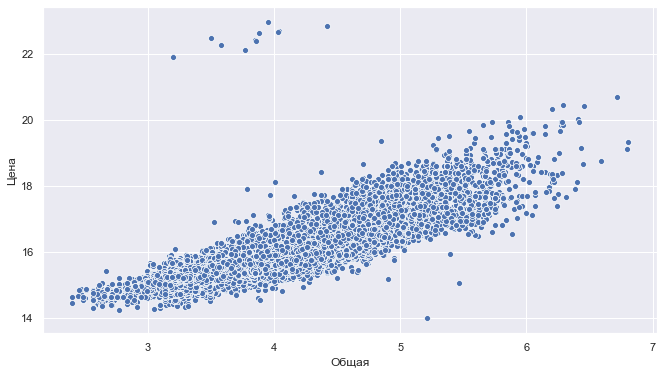

In [49]:
plt.figure(figsize=(11,6))
axes = sns.scatterplot(np.log(cian_df['Общая']+1), np.log(cian_df['Цена']))

In [50]:
#Уберём выбросы:
cian_df[np.log(cian_df['Цена'])>21]=np.nan
cian_df=cian_df.dropna()

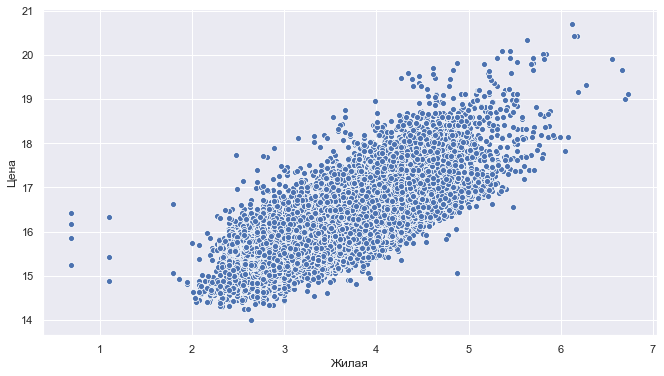

In [51]:
plt.figure(figsize=(11,6))
axes = sns.scatterplot(np.log(cian_df['Жилая']+1), np.log(cian_df['Цена']))

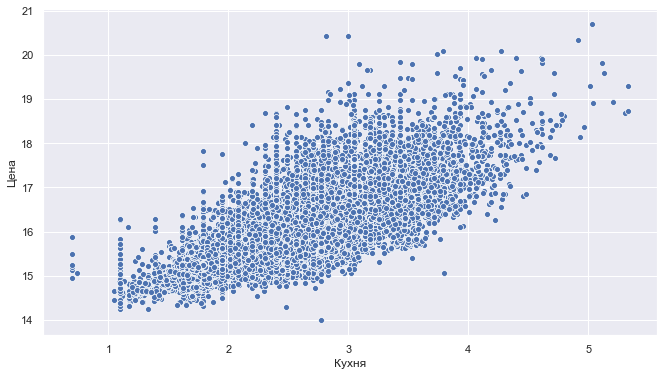

In [52]:
plt.figure(figsize=(11,6))
axes = sns.scatterplot(np.log(cian_df['Кухня']+1), np.log(cian_df['Цена']))

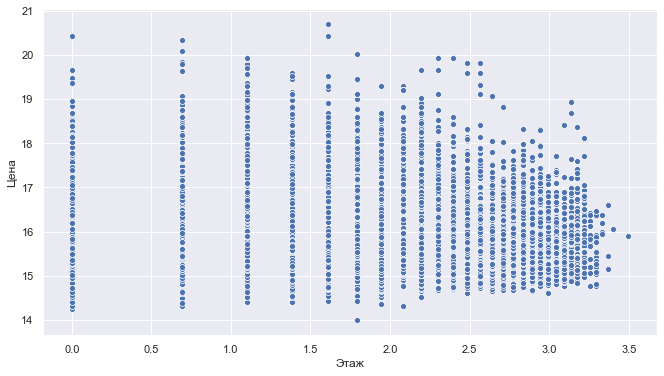

In [53]:
plt.figure(figsize=(11,6))
axes = sns.scatterplot(np.log(cian_df['Этаж']), np.log(cian_df['Цена']))

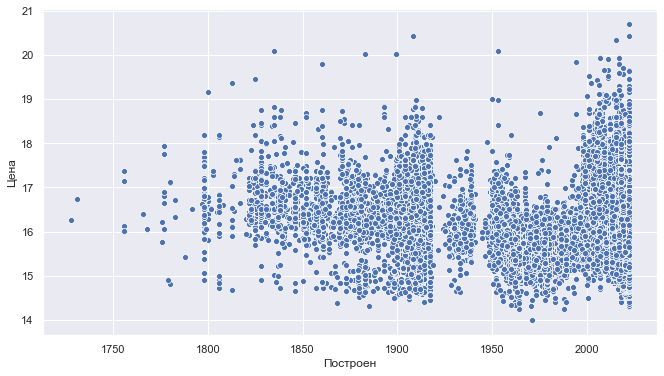

In [54]:
plt.figure(figsize=(11,6))
axes = sns.scatterplot(cian_df['Построен'], np.log(cian_df['Цена']))

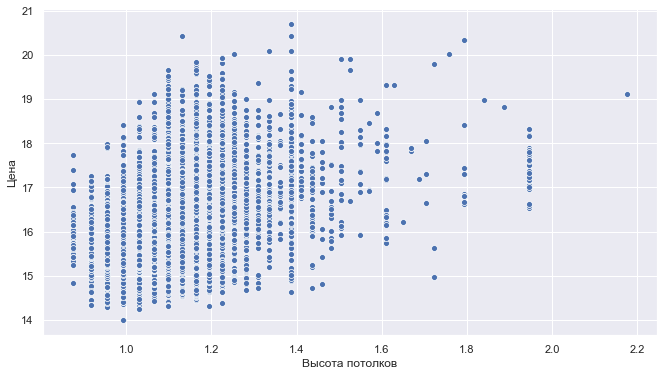

In [55]:
plt.figure(figsize=(11,6))
axes = sns.scatterplot(np.log(cian_df['Высота потолков']), np.log(cian_df['Цена']))

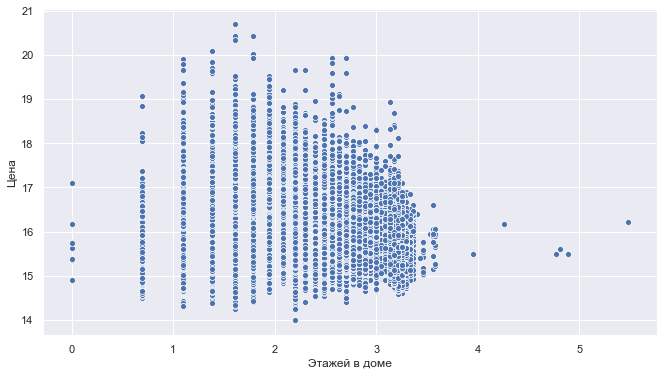

In [56]:
plt.figure(figsize=(11,6))
axes = sns.scatterplot(np.log(cian_df['Этажей в доме']), np.log(cian_df['Цена']))

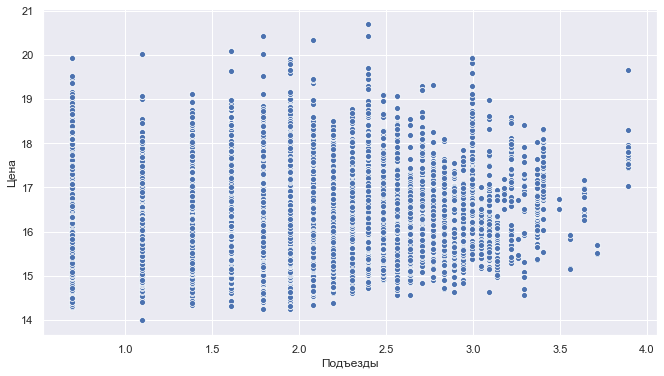

In [57]:
plt.figure(figsize=(11,6))
axes = sns.scatterplot(np.log(cian_df['Подъезды']+1), np.log(cian_df['Цена']))

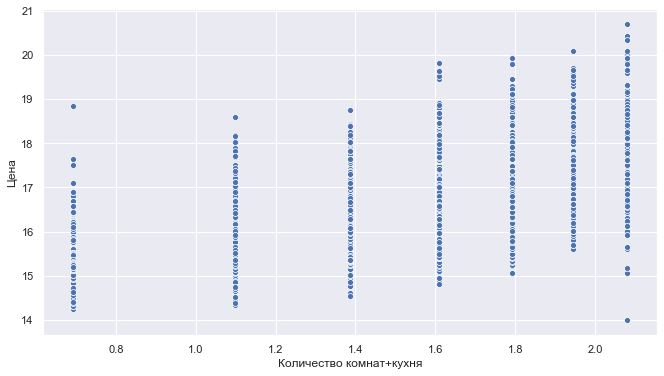

In [58]:
plt.figure(figsize=(11,6))
axes = sns.scatterplot(np.log(cian_df['Количество комнат+кухня']+1), np.log(cian_df['Цена']))

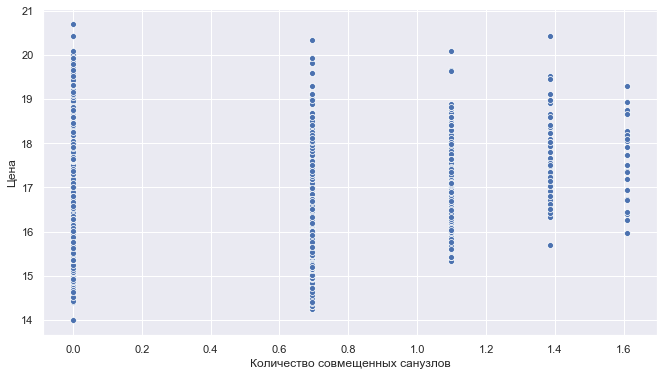

In [59]:
plt.figure(figsize=(11,6))
axes = sns.scatterplot(np.log(cian_df['Количество совмещенных санузлов']+1), np.log(cian_df['Цена']))

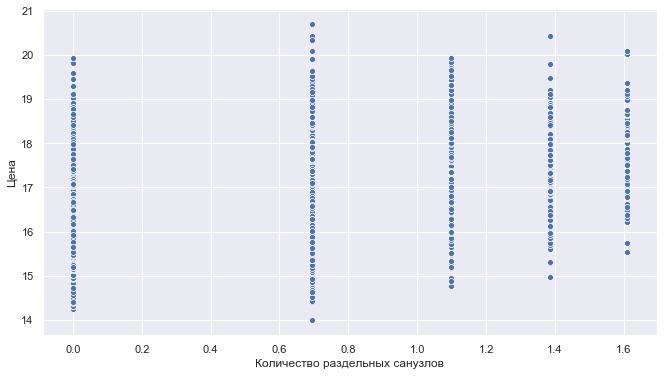

In [60]:
plt.figure(figsize=(11,6))
axes = sns.scatterplot(np.log(cian_df['Количество раздельных санузлов']+1), np.log(cian_df['Цена']))

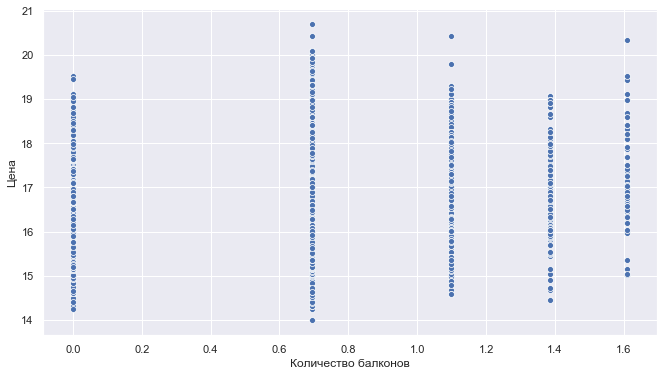

In [61]:
plt.figure(figsize=(11,6))
axes = sns.scatterplot(np.log(cian_df['Количество балконов']+1), np.log(cian_df['Цена']))

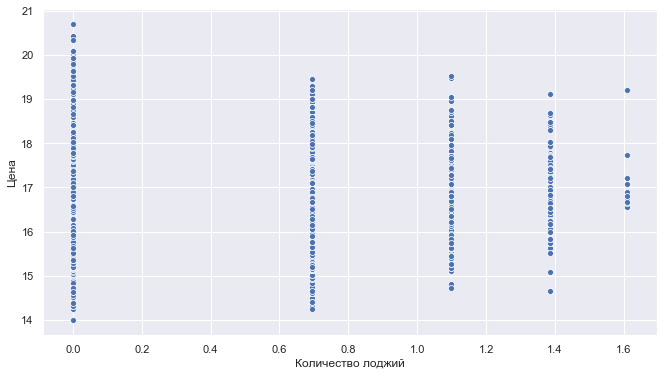

In [62]:
plt.figure(figsize=(11,6))
axes = sns.scatterplot(np.log(cian_df['Количество лоджий']+1), np.log(cian_df['Цена']))

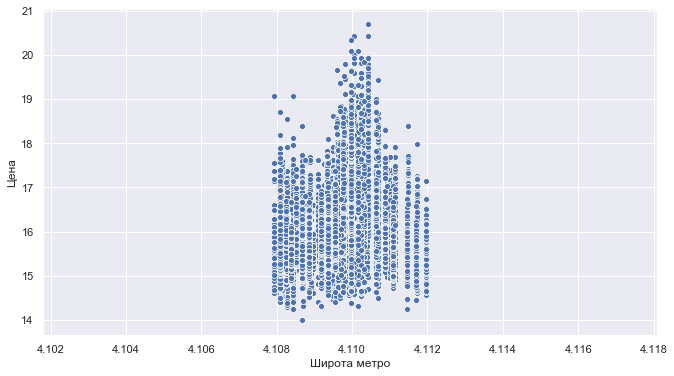

In [63]:
plt.figure(figsize=(11,6))
axes = sns.scatterplot(np.log(cian_df['Широта метро']+1), np.log(cian_df['Цена']))

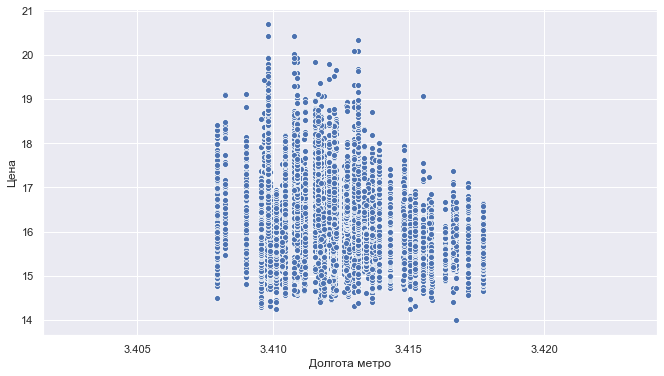

In [64]:
plt.figure(figsize=(11,6))
axes = sns.scatterplot(np.log(cian_df['Долгота метро']), np.log(cian_df['Цена']))

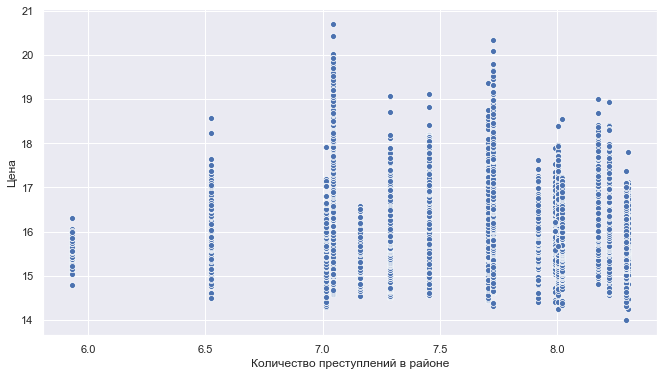

In [65]:
plt.figure(figsize=(11,6))
axes = sns.scatterplot(np.log(cian_df['Количество преступлений в районе']), np.log(cian_df['Цена']))

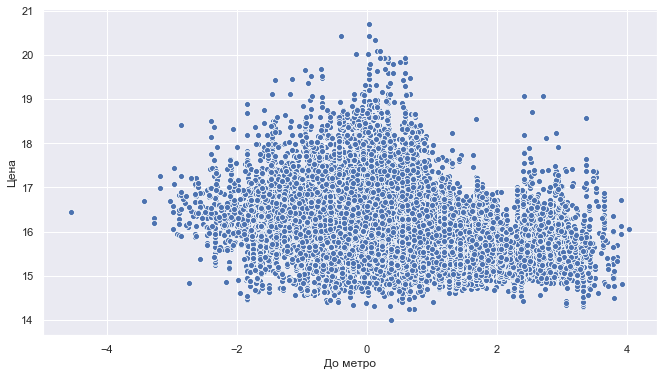

In [66]:
plt.figure(figsize=(11,6))
axes = sns.scatterplot(np.log(cian_df['До метро']), np.log(cian_df['Цена']))

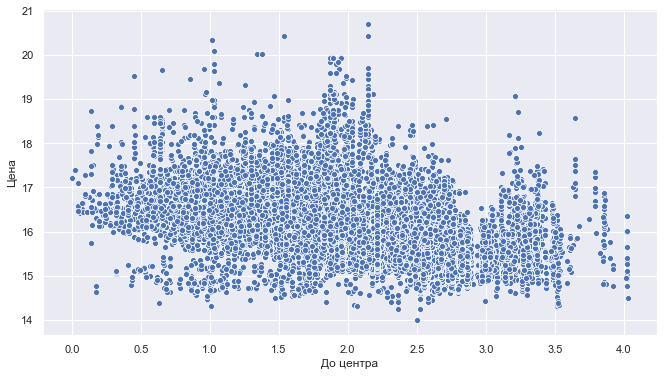

In [67]:
plt.figure(figsize=(11,6))
axes = sns.scatterplot(np.log(cian_df['До центра']+1), np.log(cian_df['Цена']))

In [68]:
cian_df.reset_index(inplace=True)
cian_df = cian_df.drop('index',axis=1)

In [70]:
cian_df.to_csv('cian_data_SPB.csv', index=False)